<a href="https://colab.research.google.com/github/HKG102/TensorBrew/blob/master/4_ClassifyHandwrittenNumbers_LinearClassificationProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand-written digits Predictor with DL**


**Load** **tensorflow**

In [1]:
import tensorflow as tf
tf.set_random_seed(42)  #for reproducebility

**Collect Data**

In [0]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()


In [6]:
print('Number of Training example: ',trainX.shape[0])
print('Number of Training example shape: ',trainX.shape)
print('Number of Trest example: ',testX.shape)
print('First 5 data for test : ',testY[0:5])

Number of Training example:  60000
Number of Training example shape:  (60000, 28, 28)
Number of Trest example:  (10000, 28, 28)
First 5 data for test :  [7 2 1 0 4]


**Convert Output label to multiple valuest**

In [7]:
print(trainY.shape)
print('First 2 examples are: ', trainY[0:2])


(60000,)
First 2 examples are:  [5 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)  #convert it into one hot encoding, each label is converting into 10 numbers
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 2 examples now are: ', trainY[0:2])

(60000, 10)
First 2 examples now are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## **Build the Graph**

In [10]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Execute the** **Graph**

In [12]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 14us/sample - loss: 1.0654 - acc: 0.6952 - val_loss: 1.1253 - val_acc: 0.6724
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0556 - acc: 0.6982 - val_loss: 1.1103 - val_acc: 0.6760
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 1.0462 - acc: 0.7017 - val_loss: 1.0958 - val_acc: 0.6802
Epoch 4/100
60000/60000 [==============================] - 1s 14us/sample - loss: 1.0369 - acc: 0.7050 - val_loss: 1.0819 - val_acc: 0.6842
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0280 - acc: 0.7078 - val_loss: 1.0685 - val_acc: 0.6875
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 1.0192 - acc: 0.7099 - val_loss: 1.0556 - val_acc: 0.6917
Epoch 7/100
60000/60000 [==============================] - 1s 14us/sample - loss: 1.0107 - acc: 0.7125 - val_l

##Mini-Batching


In [13]:
# In mini-baching data run 60000/32 = 1950 times in each epochs. It will better accuracy and lesser loss.
#Use Either this or above
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4296 - acc: 0.8753 - val_loss: 0.4066 - val_acc: 0.9023
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3541 - acc: 0.8971 - val_loss: 0.4214 - val_acc: 0.9105
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3338 - acc: 0.9034 - val_loss: 0.3972 - val_acc: 0.9133
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3257 - acc: 0.9067 - val_loss: 0.4373 - val_acc: 0.9124
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3182 - acc: 0.9087 - val_loss: 0.3580 - val_acc: 0.9176


**Save model**

In [0]:
#model.save('models/mnist_lc.h5')

In [0]:
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
#model.compile(optimizer=sgd_optimizer, loss='mse')

**Load Model**

In [0]:
#model = tf.keras.models.load_model('models/mnist_lc.h5') 

**Get some data**

In [0]:
_,(testX,testY) = tf.keras.datasets.mnist.load_data()

**Prediction**

In [15]:
#actual label for the first example in test dataset
print(testY[0])

#model prediction
prediction = model.predict(testX[0:1])

#print prediction
print(prediction[0])

#it will give the probability of every number

7
[9.3838345e-05 2.3100549e-07 4.5098259e-05 1.9979870e-03 2.0729178e-06
 2.8451363e-05 6.8492881e-08 9.9747616e-01 3.6146537e-06 3.5253991e-04]


**Prediction with Highest Probability**


In [16]:
import numpy as np

#get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#print the number
print(predicted_num)

7


**What is in the image?**

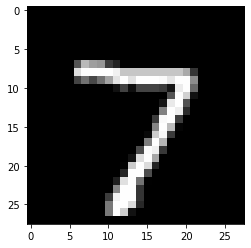

In [17]:
#lets print the test image

import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')